In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv, os, fnmatch, sys
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

CurrentWD = os.getcwd()
#obtain the current directory path for us so we don't have to manually find it
TestData = CurrentWD + "\Data\shortData"
SavePath = CurrentWD + "/OutFlow/LongTestFiles"

def HistoFromFiles(folder,SaveName):
    FullEngRun = []
    needToTestFiles = [ f for f in os.listdir(TestData + "\{val}".format(val = folder)) if ".dsc" not in f ]
    for files in needToTestFiles :
        EnergyArray = []
        EnergyArray = np.loadtxt(TestData + "\{fold}\{val}".format(fold = folder, val = files), delimiter=" ", dtype=float)#,
        FullEngRun.append(EnergyArray)

    FullEngRunHist = np.concatenate(FullEngRun,0).flatten()
    plt.figure(figsize=(8, 5.5), dpi=100,facecolor='yellow')
    plt.hist(x = FullEngRunHist,bins = np.arange(5,60))
    plt.xlabel("Energy of particle [keV]")
    plt.ylabel('Counts')
    plt.savefig(SavePath + "/{Name}.png".format(Name = SaveName),dpi = 300)



20220803 exists
First exists
LongTest1 exists
LongTest2 exists
LongTest3 exists
LongTest4 exists
LongTest5 exists
LongTest6 exists


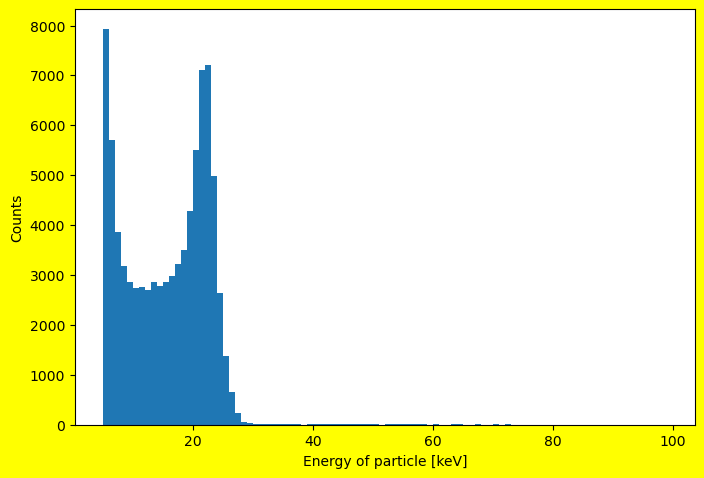

In [3]:
for folders in next(os.walk(TestData))[1]:
    if os.path.exists(SavePath + "/{Name}.png".format(Name = folders)):
        print(folders +" exists")
        continue
    else:
        HistoFromFiles(folders, folders)